## Step 1: Reading and Understanding the Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the given CSV file, and view some sample records

df = pd.read_csv(r'C:\Users\Oiendrila\Documents\UpGrad\Linear Regression Assignment\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Checking various aspects of the dataframe

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking for missing values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- The dataset contains no missing values

## Step 2: Dropping, Labelling and Visualization

1. Dropping the unwanted columns from the dataset
2. Replacing the numerical categories with labels
3. Visualising the data

In [8]:
# Dropping 'instant', 'dteday', 'casual' and 'registered' columns

df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Labelling the seasons as spring, summer, fall, winter

seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].map(seasons)

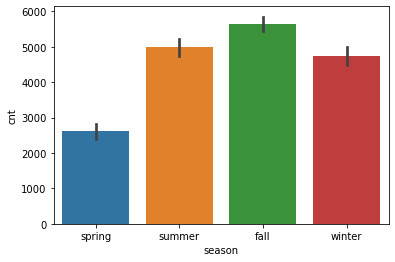

In [10]:
# Plotting barplot to check the relationship of seasons with count

sns.barplot('season', 'cnt', data=df)
plt.show()

- It can be observed that bike rentals are maximum in fall, followed by summer and winter. Rentals are the least in spring.

In [11]:
# Labelling the months from January to December

month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['mnth'] = df['mnth'].map(month)

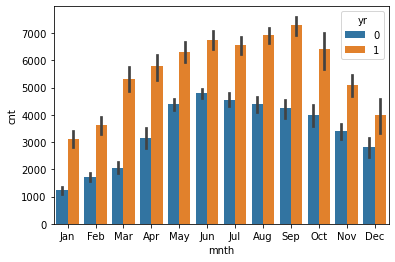

In [12]:
# Plotting barplot to check the relationship of months (yearwise) with count

sns.barplot('mnth', 'cnt', hue='yr', data=df)
plt.show()

- Here, yr=0 represents 2018 and yr=1 represents 2019. From the above plot, it is evident that the bike rentals were more in 2019 compared to 2018.

In [13]:
# Labelling the weekdays from Sunday to Saturday

weekdays = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df['weekday'] = df['weekday'].map(weekdays)

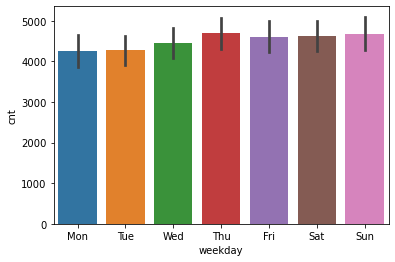

In [14]:
# Plotting barplot to check the relationship of weekdays with count

sns.barplot('weekday', 'cnt', data=df)
plt.show()

- It can be seen that the bike rents do not vary much on different days of the week.

In [15]:
# Labelling the weather situation as clear, mist+cloudy, light snow, snow+fog

weathersitu = {1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'}
df['weathersit'] = df['weathersit'].map(weathersitu)

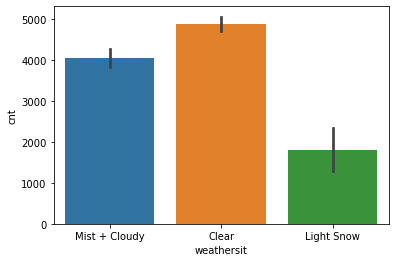

In [16]:
# Plotting barplot to check the relationship of weather situation with count

sns.barplot('weathersit', 'cnt', data=df)
plt.show()

- The above plot describes that the bike rentals are more during clear or partly cloudy weather conditions.

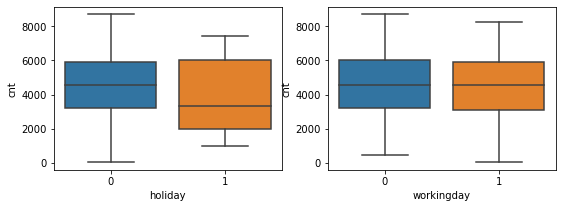

In [17]:
# Visualising the remaining categorical variables and checking their relationships with count

plt.figure(figsize= (9, 3))
plt.subplot(1, 2, 1)
sns.boxplot('holiday', 'cnt', data=df)

plt.subplot(1, 2, 2)
sns.boxplot('workingday', 'cnt', data=df)

plt.show()

- It can be seen that the mean bike rental is much lower on holidays compared to other days. 

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


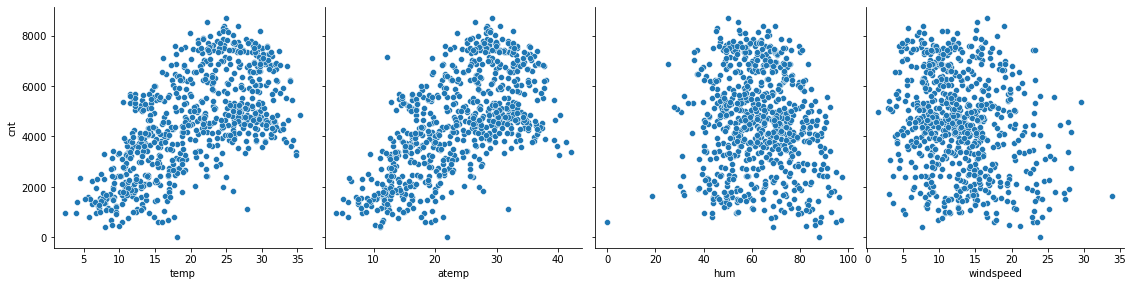

In [19]:
# Visualising the numeric variables with pairplot

sns.pairplot(df, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

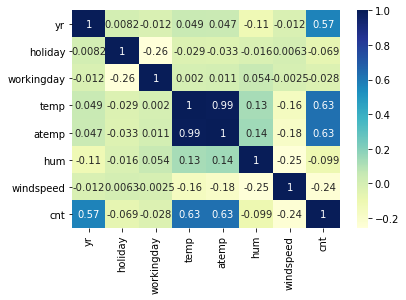

In [20]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

- As is visible from the pairplot and the heatmap, the variables temp and atemp seem to be most correlated with count. 
So linear regression using temp and atemp as the feature variables is performed.

In [21]:
# Dropping 'atemp' as it is highly correlated with 'temp' and thus multicollinearity can be avoided

df.drop('atemp', axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Step 3: Data Preparation

1. Creating dummy variables for all the categorical features
2. Dividing the dataset into train and test
3. Performing scaling
4. Dividing the data into X and y

In [22]:
# Dealing with categorical variables

seasons = pd.get_dummies(df['season'], drop_first = True)
month = pd.get_dummies(df['mnth'], drop_first = True)
week_day = pd.get_dummies(df['weekday'], drop_first = True)
working_day = pd.get_dummies(df['workingday'], drop_first = True)
weathersitu = pd.get_dummies(df['weathersit'], drop_first = True)

In [23]:
df = pd.concat([df, seasons, month, week_day, working_day, weathersitu], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,1,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,1,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,1,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Dropping the categorical variables as their dummies already exist

df.drop(['season', 'mnth', 'weekday', 'workingday', 'weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,1,Light Snow,Mist + Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
# Scaling the continuous variables using MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [27]:
# Scaling 'temp', 'hum', 'windspeed' and 'cnt' variables

conti = ['temp', 'hum', 'windspeed', 'cnt']
df_train[conti] = scalar.fit_transform(df_train[conti])
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,1,Light Snow,Mist + Cloudy
653,1,0,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,1,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.343137
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Dividing the dataset into X and y

X_train = df_train
y_train = df_train.pop('cnt')

## Step 4: Data Modelling and Evaluation

1. Creating Linear Regression model using mixed approach
2. Checking various assumptions
3. Checking Adjusted R-squared for both train and test data
4. Report final model

### Recursive Feature Elimination (RFE)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Representing LinearRegression as lr(Creating LinearRegression Object)

lm = LinearRegression()

# Fitting the model using lr.fit()

lm.fit(X_train, y_train)

# Selecting the top 15 variables

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [31]:
# Checking the selected features and their rankings

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 (1, False, 3),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [32]:
# Keeping the RFE selected columns and removing the other columns from the predictor dataset

rfecol = X_train.columns[rfe.support_]
rfecol

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed',     1],
      dtype='object')

In [34]:
X_train_rfe = X_train[rfecol]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light Snow,Mist + Cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


### Building model using statsmodel

In [35]:
import statsmodels.api as sm

In [36]:
# Add a constant to get an intercept

X_train_lm = sm.add_constant(X_train_rfe)

# Fit the resgression line using 'OLS'

lr = sm.OLS(y_train, X_train_lm).fit()

In [37]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted

lr.params

const            0.320243
yr               0.230328
holiday         -0.091228
temp             0.479977
hum             -0.160227
windspeed       -0.188457
spring          -0.061737
summer           0.040767
winter           0.103435
Dec             -0.037199
Jan             -0.043748
Jul             -0.055495
Nov             -0.040949
Sep              0.074891
Light Snow      -0.248116
Mist + Cloudy   -0.055876
dtype: float64

In [38]:
# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.34e-189
Time:                        20:23:35   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

#### Checking Variance Infation Factor (VIF) since in all the columns p-value <0.05
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test the linear model. The formula for calculating `VIF` for the ith element is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [39]:
# Checking for the VIF values of the feature variables 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist + Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


In [41]:
# Dropping 'hum' as it shows high VIF

X_train_new = X.drop('hum', 1)

In [42]:
# Building a new fitted model

X_train_lm = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [43]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.57e-186
Time:                        20:23:36   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679

In [44]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Mist + Cloudy,1.56


In [45]:
# Dropping 'summer' as it has high p-value

X_train_new_1 = X.drop('summer', 1)

In [46]:
# Building another new fitted model

X_train_lm = sm.add_constant(X_train_new_1)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.08e-186
Time:                        20:23:36   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2893      0.025     11.427

In [48]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Mist + Cloudy,1.53
6,Dec,1.46
8,Jul,1.36


In [49]:
# Dropping 'Nov' as it has high p-value

X_train_new_2 = X.drop('Nov', 1)

In [50]:
# Building another new fitted model

X_train_lm = sm.add_constant(X_train_new_2)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.02e-186
Time:                        20:23:36   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2769      0.025     11.074

In [52]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,Jan,1.64
11,Mist + Cloudy,1.53
8,Jul,1.36
6,Dec,1.29
9,Sep,1.20


In [53]:
# Dropping 'Dec' as it has high p-value

X_train_new_3 = X.drop('Dec', 1)

In [54]:
# Building another new fitted model

X_train_lm = sm.add_constant(X_train_new_3)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [55]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.13e-186
Time:                        20:23:36   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2657      0.025     10.843

In [56]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,Jan,1.60
10,Mist + Cloudy,1.53
5,winter,1.40
7,Jul,1.36
8,Sep,1.20
9,Light Snow,1.08


In [57]:
# Dropping 'Jan' as it has high p-value

X_train_new_4 = X.drop('Jan', 1)

In [58]:
# Building another new fitted model

X_train_lm = sm.add_constant(X_train_new_4)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.16e-186
Time:                        20:23:36   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.024     10.530

In [60]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist + Cloudy,1.51
5,winter,1.40
6,Jul,1.35
7,Sep,1.20
8,Light Snow,1.08
1,holiday,1.04


- The VIFs and p-values both are within an acceptable range. Now predictions can be made using this model only.

### Residual Analysis of Train Data

In [61]:
y_train_count = lr_6.predict(X_train_lm)

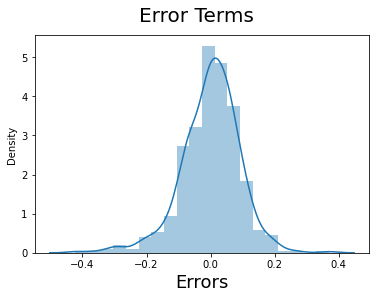

In [62]:
# Plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

- The above histogram plot shows that the error terms are distributed normally about the mean zero

### Making Predictions using the Final Model

In [63]:
pd.set_option('display.max_columns', None)
df_test.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,1,Light Snow,Mist + Cloudy
184,0,1,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
221,0,0,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
df_test.columns

Index([           'yr',       'holiday',          'temp',           'hum',
           'windspeed',           'cnt',        'spring',        'summer',
              'winter',           'Aug',           'Dec',           'Feb',
                 'Jan',           'Jul',           'Jun',           'Mar',
                 'May',           'Nov',           'Oct',           'Sep',
                 'Mon',           'Sat',           'Sun',           'Thu',
                 'Tue',           'Wed',               1,    'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [65]:
df_test = df_test.drop(1, axis = 1)

In [66]:
df_test.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [67]:
# Applying the scaling on the test sets

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scalar.transform(df_test[num_vars])

In [68]:
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
# Adding constant variable to test dataframe

X_test_m4 = sm.add_constant(X_test)

In [71]:
# Creating X_test_new dataframe by dropping variables from X_test_new

X_test_m4 = X_test_m4.drop(["hum", "summer", "Aug", "Dec", "Feb", "Jan", "Jun", "Mar", "May", "Nov", "Oct", 
                            "Mon", "Sat", "Sun", "Thu", "Tue", "Wed"], axis = 1)

In [72]:
X_test_m4.head()

,const,yr,holiday,temp,windspeed,spring,winter,Jul,Sep,Light Snow,Mist + Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0


In [73]:
# Making predictions using the sixth model

y_pred_lm = lr_6.predict(X_test_m4)

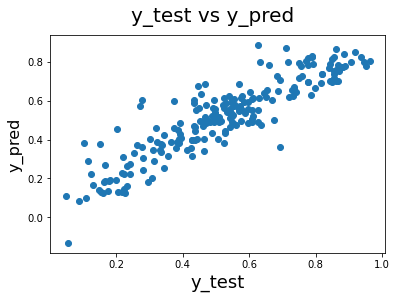

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)
plt.show()

It can observed that the equation of the best fitted line is:

$ cnt = 0.2519 + 0.2341  \times  yr - 0.0986  \times  holiday + 0.4515 \times temp - 0.1398 \times windspeed - 0.1108 \times spring + 0.0473 \times winter - 0.0727 \times Jul + 0.0577 \times Sep - 0.2864 \times Light Snow - 0.0811 \times Mist + Cloudy $

#### Calculating the R-squared score on the test set

In [75]:
# Calculating the RMSE

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_lm))

0.09574033200511813

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm)

0.8070101019557963

#### Calculating Adjusted R-squared Value for Test Dataset
The formula for calculating `Adjusted R-squared` is:

### $ {R_a}^2 = 1 - (1 - R^2) * \frac{n - 1}{n - p - 1} $

In [77]:
X_test_new = X_test_m4.drop('const', axis = 1)
X_test_new.shape

(219, 10)

In [78]:
# Calculating the number of rows in X

n = X_test_new.shape[0]

# Calculating the number of features (predictors 'p') 

p = X_test_new.shape[1]

r2_score = 0.8070101019557961
adj_r2_score = 1 - (1-r2_score)*((n-1)/(n-p-1))
adj_r2_score

0.7977317414729017

#### Final Model
- Train dataset has R-squared value of 0.83
- Test dataset has R-squared value of 0.81

- Train dataset has adjusted R-squared value of 0.83
- Test dataset has adjusted R-squared value of 0.80